# Lab 3: Continuous Data

<img src="https://images.freeimages.com/images/large-previews/bc2/wine-1328360.jpg" width="500"/>

Today, everything is all about wine. The dataset we are using today, is full of continous, numeric data. Let's explore the dataset!


## TASK 1: Exploration and Initial Analysis


### Data Collection
Read the file [``winedata.csv``](https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/winedata.csv), which is a dataset listing the features of several different wines (e.g. alchol level, acids etc.), for an exploratory data analysis.

In [3]:
# YOUR CODE HERE
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/winedata.csv')
df.head()


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,NaN,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,NaN,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Ignore this cell - this is for automatic grading.

### Data Exploration

Print the first lines of the dataset and examine it. (``head()``, ``describe()``). Is there a feature that contains invalid values? If yes, which?

In [5]:
# YOUR CODE HERE
df.head()
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline
count,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.362659,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.276332,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.550000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Dynamically create a Python list, that contains the column names of the features that contain invalid values. Store it to the variable `colums_containing_nan`.

In [18]:
# YOUR CODE HERE
colums_containing_nan = df.columns[df.isna().any()].tolist()
colums_containing_nan

[]

In [ ]:
# Ignore this cell - this is for automatic grading.

### Data Preprocessing
Clean the dataset using appropriate methods. See Lecture 5 for some approaches. Do this inplace on DataFrame `df`.

In [15]:
# YOUR CODE HERE
df.loc[df['Ash'].isna(), 'Ash'] = df['Ash'].mean()
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.362659,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.272401,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.540000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# Ignore this cell - this is for automatic grading.

Elaborate on why you exactly choosed this method to clean the dataset? Max. three sentences!

Wir halten die Veränderung der Daten damit bei eineme minimum, da 

### Data Visualization

Draw a seaborn boxplot of each feature (=column) in a single plot.

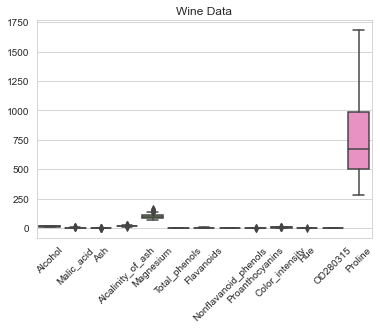

In [26]:
# YOUR CODE HERE
import seaborn as sns


# Set theme
sns.set_style('whitegrid')

# Boxplot
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Wine Data')
plt.show()

## TASK 2: Normalization of Data

As the proline feature has a different scale, we want to standardize all features to have zero mean and standard variance. Use the [``StandardScaler()``](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from sklearn as an easy way to achieve this.

### Data processing
Normalize the data using ``StandardScaler()``. Store the normalized data to a DataFrame called `df_s`.

In [81]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
df_cols = df.columns
scaler = StandardScaler()
data = scaler.fit_transform(df)
df_s = pd.DataFrame(data, columns= df_cols)


In [ ]:
# Ignore this cell - this is for automatic grading.

### Data Visualization

Visualize the transformed data.

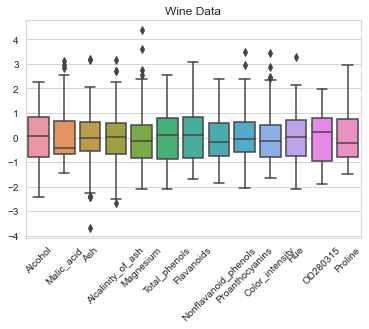

In [82]:
# YOUR CODE HERE
import seaborn as sns


# Set theme
sns.set_style('whitegrid')

# Boxplot
sns.boxplot(data=df_s)
plt.xticks(rotation=45)
plt.title('Wine Data')
plt.show()

## TASK 3: Dimension Reduction

In order to observe similarities between all data points (= wines), we can draw them in a two-dimensional space: However, we first need a dimensionality reduction - to reduce the currently 13 features. [``TSNE``](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne) is a well known and state-of-the-art method for reducing the dimensionality of the data. The idea is to best preserve the distance between data points also in 2D.

### Dimension Reduction using TSNE

Instantiate a TSNE object with meaningful parameters (set the number of target dimensions to $2$), transform scaled data into a two dimensional space, and store it in a DataFrame named `df_d`.

In [104]:
# YOUR CODE HERE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=1000,perplexity=40,random_state=0)
data =  tsne.fit_transform(df_s)
df_d = pd.DataFrame(data)
df_d.head

<bound method NDFrame.head of               0           1
0   -169.070847  179.326813
1   -220.641190  183.869125
2   -236.076355  145.796860
3   -292.295135   77.954391
4   -122.977715   85.370171
..          ...         ...
173  246.730362  -92.378860
174  268.768402  -88.705963
175  292.972076  -84.107674
176  302.264374  -65.329666
177  283.217255 -102.850014

[178 rows x 2 columns]>

In [52]:
# Ignore this cell - this is for automatic grading.

### Data Visualization
Use seaborn to plot the data in a scatterplot.

Text(0, 0.5, 'relativ value')

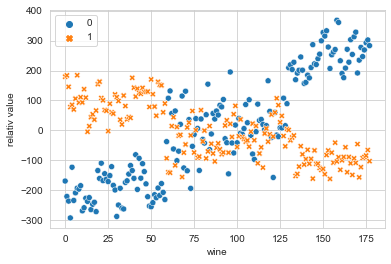

In [110]:
# YOUR CODE HERE
sns.scatterplot( data = df_d)
plt.xlabel("wine")
plt.ylabel('relativ value')

## TASK 4
Load the ``winelabels.csv`` which indicate the vineyard that produced the wines (numbers from 0 to 2). Use this to "label" the points in the scatterplot with one color per vineyard. Add a legend.

<AxesSubplot:xlabel='Value 1', ylabel='Value 2'>

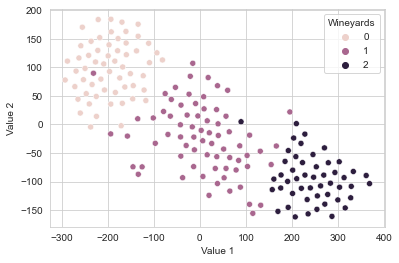

In [146]:
# YOUR CODE HERE
label = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/winelabels.csv')
label.rename(columns={"0":"Wineyards"}, inplace=True)
wineyards = label.join(df_d)
wineyards.rename(columns={0:"Value 1", 1:"Value 2"}, inplace="True")
sns.scatterplot(data = wineyards, x="Value 1", y = "Value 2", hue="Wineyards")